In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas_profiling

In [3]:
df= pd.read_csv('Train.txt')

In [4]:
df.columns= ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [5]:
df01= df.copy()

In [6]:
#seprate categorical and contionus variables
df01_continous= df01.select_dtypes(include=['float64', 'int64'])
df01_categorical= df01.select_dtypes(include=['object'])

In [7]:
### change the attack value
df01.attack= np.where(df01.attack== 'normal', 1, 0)
#temp2= np.where(temp2== 'normal', 1, 0)

In [9]:
df01.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

###  outlier treartment

In [10]:
df01_continous = df01_continous.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [11]:
temp= df01_continous.apply(lambda x: x.clip(upper = x.quantile(0.985)))

In [82]:
temp1= pd.concat([temp, df01_categorical], axis=1, join='inner')

###  high cardinality treatment service


In [83]:
from sklearn import preprocessing

In [84]:
le = preprocessing.LabelEncoder()

In [85]:
le.fit(temp1['service'])

LabelEncoder()

###  dummy variable creation

In [86]:
categorial_features= ['protocol_type', 'flag']

In [87]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [88]:
for c_feature in categorial_features:
    temp1= create_dummies(temp1, c_feature)

In [89]:
temp_test_2= temp1.copy()

In [90]:
temp_test_2.attack= np.where(temp_test_2.attack== 'normal', 1, 0)

In [26]:
#temp_test_2.drop_duplicates(keep='first', inplace= True)

In [91]:
temp_test_2.service= le.transform(temp1['service']) 

In [92]:
temp_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 53 columns):
duration                       125972 non-null float64
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null float64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 non-null int64
num_shells                     125972 non-null int64
num_access_files               125972 non-null int64
num_outbound_cmds              125972

In [34]:
temp_test_2.to_excel('Normal Classification Df.xlsx', index=False)

###  Model building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [93]:
feature_columns= temp_test_2.columns.difference(["hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag" ])

In [94]:
train_X, test_X, train_y, test_y = train_test_split( temp_test_2[feature_columns],
                                                  temp_test_2["attack"],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [95]:
train_X.head()

,dst_bytes,duration,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land,protocol_type_tcp,protocol_type_udp,service,src_bytes,urgent,wrong_fragment
110848,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,49,0,0,0
4591,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,20,10389,0,0
89586,92.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,12,42,0,0
55086,2780.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,24,300,0,0
52860,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,17,0,0,0


In [96]:

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:

logreg.predict(train_X)   #by default, it use cut-off as 0.5

array([0, 1, 1, ..., 0, 1, 0])

In [98]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('dst_bytes', 0.00011819631229405663),
 ('duration', 0.0005529160990247195),
 ('flag_REJ', -0.6455209628524662),
 ('flag_RSTO', -0.5306415240046181),
 ('flag_RSTOS0', -0.05469517327076425),
 ('flag_RSTR', -1.0605518236719103),
 ('flag_S0', -6.608785030170581),
 ('flag_S1', 0.3537732409753589),
 ('flag_S2', 0.13895172318151064),
 ('flag_S3', 0.05495128731480252),
 ('flag_SF', 4.184260686150114),
 ('flag_SH', -0.1328367041276344),
 ('land', 0.0),
 ('protocol_type_tcp', 4.122119867247915),
 ('protocol_type_udp', 2.0549729978003666),
 ('service', -0.024244825309453506),
 ('src_bytes', -0.0002408912251528222),
 ('urgent', 0.0),
 ('wrong_fragment', 0.0)]

In [99]:
logreg.intercept_

array([-4.30707124])

In [100]:
#Predicting the test cases
network_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [101]:
network_test_pred= network_test_pred.reset_index()

In [102]:
network_test_pred.to_excel('network_test_predictions using logistic.xlsx', index=False)

In [103]:
network_test_pred.sample(n=10)

,index,actual,predicted
34945,19397,0,0
3978,116530,1,1
20785,83296,1,1
27912,58337,1,1
17433,54165,1,1
14637,55305,1,1
24887,20641,0,0
6962,17355,0,0
33145,76838,0,0
15691,57060,0,0


In [104]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( network_test_pred.actual,
                            network_test_pred.predicted, [1,0] )
cm

array([[18592,  1509],
       [ 1706, 15985]], dtype=int64)

In [105]:
import seaborn as sn

In [106]:
import matplotlib.pyplot as plt

Text(0.5, 12.5, 'Predicted label')

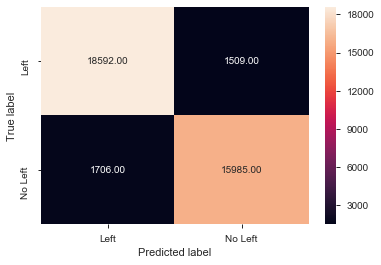

In [107]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
score = metrics.accuracy_score( network_test_pred.actual, network_test_pred.predicted )
round( float(score), 2 )

0.91

In [109]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

       dst_bytes  duration  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  \
85247     1052.0      29.0         0          0            0          0   

       flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  land  \
85247        0        0        0        0        1        0     0   

       protocol_type_tcp  protocol_type_udp  service  src_bytes  urgent  \
85247                  1                  0       19        311       0   

       wrong_fragment  
85247               0  
[[0.0264906 0.9735094]]


In [110]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.026491,0.973509
1,0.999459,0.000541
2,0.648339,0.351661
3,0.427583,0.572417
4,0.016843,0.983157


In [111]:
network_test_pred = pd.concat( [network_test_pred, predict_proba_df], axis = 1 )

In [112]:
network_test_pred.columns = ['index', 'actual', 'predicted', 'Attack_0', 'Attack_1']


In [60]:
network_test_pred.to_excel('Final logistic normal output.xlsx')

In [113]:
auc_score = metrics.roc_auc_score( network_test_pred.actual, network_test_pred.Attack_1 )
float( auc_score )

0.9679592100365709

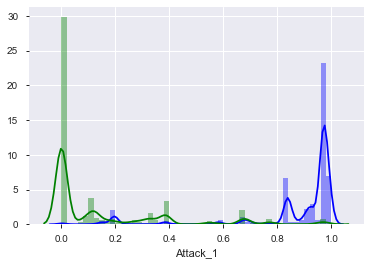

In [114]:
sn.distplot( network_test_pred[network_test_pred.actual == 1]["Attack_1"], color = 'b' )
sn.distplot( network_test_pred[network_test_pred.actual == 0]["Attack_1"], color = 'g' )

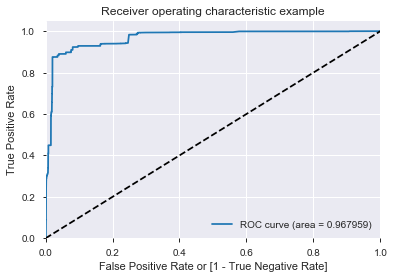

In [115]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( network_test_pred.actual,
                                     network_test_pred.Attack_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [116]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.99976962 0.99976962 0.99936786 0.99936252 0.99932687 0.99930842
 0.99930414 0.99929571 0.99928184 0.99928063]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 9.94975374e-05 1.49246306e-04 1.98995075e-04
 2.48743844e-04 2.98492612e-04 3.48241381e-04 3.97990150e-04
 4.47738918e-04 4.97487687e-04]


In [117]:
cutoff_prob = thresholds[(np.abs(tpr - 0.9)).argmin()]

In [118]:
float( cutoff_prob )

0.6761746962314938

In [119]:
round( float( cutoff_prob ), 2 )

0.68

In [153]:
pandas_profiling.ProfileReport(temp1).to_file(output_file='normalvsrest.html')

###  Multi Class Classification

In [120]:
temp1.attack.loc[temp1.attack== 'normal']= 'Normal'

C:\Users\Krn\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [121]:
temp1.attack.loc[temp1.attack.isin(['back','land', 'neptune', 'teardrop', 'smurf', 'pod', 'apache2', 'udpstorm', 'processtable', 'worm'])] ='DoS'

In [122]:
temp1.attack.loc[temp1.attack.isin(['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint'])]= 'Probe'

In [123]:
temp1.attack.loc[temp1.attack.isin(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop'
                  'snmguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named'])]= 'R2L'

In [124]:
temp1.attack.loc[temp1.attack.isin(['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps'])]= 'U2R'

In [125]:
temp1.attack.unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [126]:
temp1.service= le.transform(temp1['service']) 

In [134]:
temp1.drop_duplicates(keep='first', inplace=True)

In [135]:
onevrest= temp1.copy()

In [136]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [137]:
onevsrest_y= label_binarize(onevrest.attack, classes=['Normal', 'DoS', 'R2L', 'Probe', 'U2R']) 
n_classes= 5

In [138]:
X_train_ovr, X_test_ovr, y_train_ovr, y_test_ovr =\
    train_test_split(onevrest[feature_columns], onevsrest_y, test_size=0.33, random_state=0)

In [139]:
# classifier model
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train_ovr, y_train_ovr).decision_function(X_test_ovr)



C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

In [140]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_ovr[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [158]:
# # Plot of a ROC curve for a specific class 
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

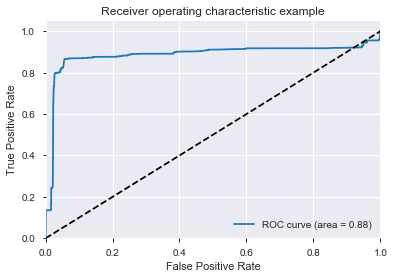

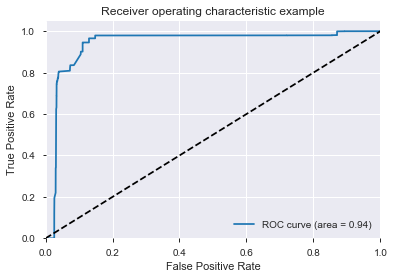

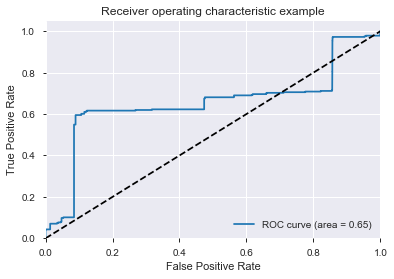

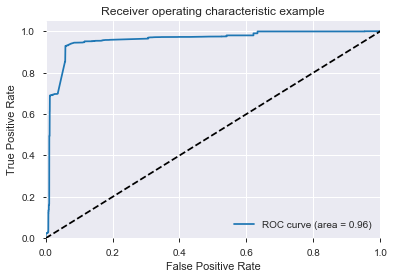

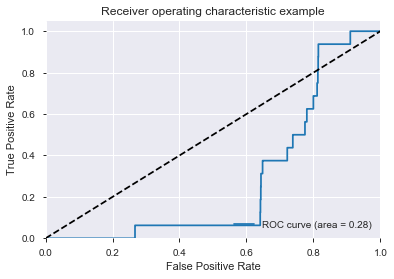

In [141]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [167]:
#model = clf.fit(X_train_ovr, y_train_ovr)

In [168]:
#y_score = clf.fit(X_train_ovr, y_train_ovr).decision_function(X_test_ovr)

In [142]:
classifir= OneVsRestClassifier(LinearSVC()).fit(X_train_ovr, y_train_ovr)


C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Krn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [143]:
output= classifir.predict(X_test_ovr)

In [153]:
df2=pd.DataFrame(np.array(output),
                   columns=['class 0 Predicted', 'Class 1 Predicted', 'Class 2 Predicted', 'Class 3 Predicted', 'Class4 Predicted'])

In [152]:
y_test_ovr

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [154]:
df3= pd.DataFrame(y_test_ovr, columns=['class 0 Actual', 'Class 1 Actual', 'Class 2 Actual', 'Class 3 Actual', 'Class4 Actual'])

In [155]:
out= pd.concat([df2, df3], axis=1)

In [157]:
out.to_excel('final output logistic multiclass.xlsx')